# Titanic PCA and 分布圖

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 

In [2]:
df= sns.load_dataset("titanic")
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
df['survived'].value_counts()
df['survived'].unique()
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [4]:
df["age"].fillna(df['age'].median(),inplace=True)

In [5]:
df[pd.isna(df['embark_town'])]
df.iloc[[61-1,829-1]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
828,1,3,male,28.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True


In [6]:
df['embark_town'].fillna(method='ffill', inplace=True)
df.iloc[[61,829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Cherbourg,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Queenstown,yes,True


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [8]:
df["sex"]= df['sex'].map({'male':1, 'female':0})
df['embark_town']=df['embark_town'].map({"Southampton":1, "Cherbourg":2, "Queenstown":3})
df["embarked"]= df["embarked"].map({'S':1, 'C':2, 'Q':3})
df["class"]= df['class'].map({'First':1, 'Second':2, 'Third':3})
df["who"]= df['who'].map({'man':1, 'woman':2, 'child':3})
df["adult_male"]= df['adult_male'].map({True:1, False:0})
df["alive"]= df['alive'].map({'yes':1, 'no':0})
df["alone"]= df['alone'].map({True:1, False:0})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1.0,3,1,1,NaN,1,0,0
1,1,1,0,38.0,1,0,71.2833,2.0,1,2,0,C,2,1,0
2,1,3,0,26.0,0,0,7.9250,1.0,3,2,0,NaN,1,1,1
3,1,1,0,35.0,1,0,53.1000,1.0,1,2,0,C,1,1,0
4,0,3,1,35.0,0,0,8.0500,1.0,3,1,1,NaN,1,0,1


In [9]:
df.drop('deck', axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,1.0,3,1,1,1,0,0
1,1,1,0,38.0,1,0,71.2833,2.0,1,2,0,2,1,0
2,1,3,0,26.0,0,0,7.9250,1.0,3,2,0,1,1,1
3,1,1,0,35.0,1,0,53.1000,1.0,1,2,0,1,1,0
4,0,3,1,35.0,0,0,8.0500,1.0,3,1,1,1,0,1


In [10]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < -0.8  or val>0.8 else 'black'
    return 'color: %s' % color
df.corr().style.applymap(color_negative_red)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,embark_town,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.108669,0.472637,-0.557080,0.113083,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.043835,-0.016018,0.094035,0.037256,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.118593,-0.722076,0.908578,-0.123271,-0.543351,0.303646
age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.007165,-0.432737,0.247704,0.000866,-0.064910,0.171647
sibsp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.060606,0.342977,-0.253586,-0.062233,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.079320,0.413947,-0.349943,-0.080858,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.063462,0.136513,-0.182024,0.066980,0.257307,-0.271832
embarked,0.108669,0.043835,-0.118593,-0.007165,-0.060606,-0.079320,0.063462,1.000000,0.076151,-0.110351,1.000000,0.108669,0.018867
who,0.472637,-0.016018,-0.722076,-0.432737,0.342977,0.413947,0.136513,0.076151,1.000000,-0.914615,0.078865,0.472637,-0.452753
adult_male,-0.557080,0.094035,0.908578,0.247704,-0.253586,-0.349943,-0.182024,-0.110351,-0.914615,1.000000,-0.114625,-0.557080,0.404744


<AxesSubplot:>

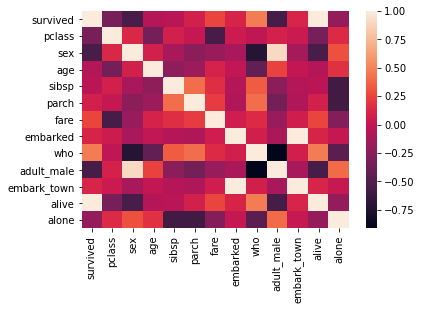

In [11]:
sns.heatmap(df.corr())

In [12]:
df.drop(['parch','who','alone','embarked', 'alive', 'class','adult_male'], axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,fare,embark_town
0,0,3,1,22.0,1,7.2500,1
1,1,1,0,38.0,1,71.2833,2
2,1,3,0,26.0,0,7.9250,1
3,1,1,0,35.0,1,53.1000,1
4,0,3,1,35.0,0,8.0500,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int64  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [14]:
bins=[0, 15, 35, 60, 100]
pd.cut(df['age'], bins, labels=[0,3,2,1]) 
df['age']=pd.cut(df['age'], bins, labels=[0,3,2,1]) 
print(pd.value_counts(df['age']).sort_index)

<bound method Series.sort_index of 3    591
2    195
0     83
1     22
Name: age, dtype: int64>


In [15]:
X = df.iloc[:, 1:]
X

,pclass,sex,age,sibsp,fare,embark_town
0,3,1,3,1,7.2500,1
1,1,0,2,1,71.2833,2
2,3,0,3,0,7.9250,1
3,1,0,3,1,53.1000,1
4,3,1,3,0,8.0500,1
...,...,...,...,...,...,...
886,2,1,3,0,13.0000,1
887,1,0,3,0,30.0000,1
888,3,0,3,1,23.4500,1
889,1,1,3,0,30.0000,2


In [16]:
y=np.array(df['survived'])
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.2)

In [18]:
from sklearn.preprocessing import StandardScaler
sclar=StandardScaler()
X_train=sclar.fit_transform(X_train)
X_test=sclar.transform(X_test)

In [19]:
#covariance matrix
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs= np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[1.66532582 0.38129379 1.31858003 1.08946621 0.73983789 0.81393507]


In [20]:
#Total and explained variance
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

<function matplotlib.pyplot.show(close=None, block=None)>

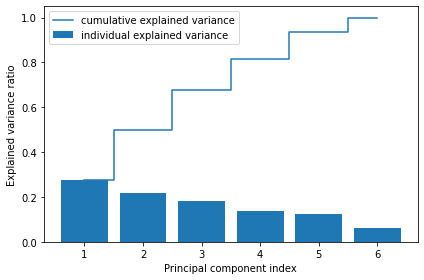

In [21]:
plt.bar(range(1, 7), var_exp, alpha=1.0, align='center', label='individual explained variance')
plt.step(range(1, 7), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show


In [22]:
#Feature transformation
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [23]:
w =np.hstack((eigen_pairs[0][1][:, np.newaxis],
              eigen_pairs[1][1][:,np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.58865918  0.32260668]
 [-0.36622467 -0.09950734]
 [-0.22812852 -0.59330615]
 [ 0.20029728  0.67612981]
 [ 0.65005112 -0.15651082]
 [ 0.06805721 -0.22883155]]


In [24]:
X_train[0].dot(w)

array([-1.12394554, -0.68424446])

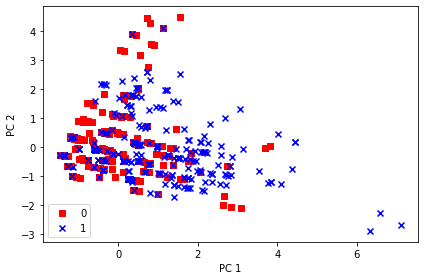

In [25]:
X_train_pca=X_train.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

## sklearn PCA

In [26]:
pca= PCA()
X_train_pca=pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.27716448, 0.21945468, 0.18132268, 0.13546532, 0.12313313,
       0.06345971])

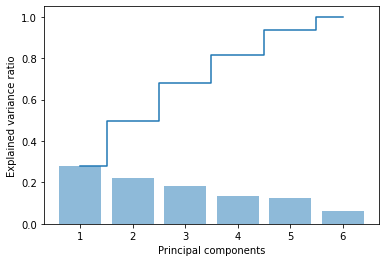

In [27]:
plt.bar(range(1, 7), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 7), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [28]:
pca=PCA(n_components=2)
X_train_P=pca.fit_transform(X_train)
X_test_P=pca.transform(X_test)

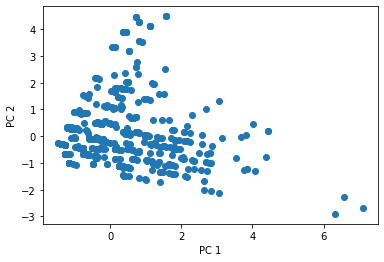

In [29]:
plt.scatter(X_train_P[:, 0], X_train_P[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()